<a href="https://colab.research.google.com/github/LCaravaggio/DataExtraction/blob/main/API_BCRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadísticas Cambiarias

In [1]:
import requests

moneda='EUR'
fechadesde='2024-01-01'
fechahasta='2024-06-07'
limit=100
offset=10

url = f'https://api.bcra.gob.ar/estadisticascambiarias/v1.0/Cotizaciones/{moneda}?fechadesde={fechadesde}&fechahasta={fechahasta}&limit={limit}&offset={offset}'
response = requests.get(url, verify=False)

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [2]:
import pandas as pd
import json

json_data = json.loads(response.text)

results = json_data['results']

data_list = []
for item in results:
    fecha = item['fecha']
    for detalle in item['detalle']:
        detalle['fecha'] = fecha
        data_list.append(detalle)

df = pd.DataFrame(data_list)

In [3]:
df

codigoMoneda descripcion  tipoPase  tipoCotizacion       fecha
0           EUR        EURO    1.0852       966.37060  2024-05-24
1           EUR        EURO    1.0811       962.17900  2024-05-23
2           EUR        EURO    1.0837       963.95115  2024-05-22
3           EUR        EURO    1.0854       964.92060  2024-05-21
4           EUR        EURO    1.0865       965.35525  2024-05-20
..          ...         ...       ...             ...         ...
92          EUR        EURO    1.0964       892.25032  2024-01-08
93          EUR        EURO    1.0944       888.87168  2024-01-05
94          EUR        EURO    1.0950       888.81150  2024-01-04
95          EUR        EURO    1.0911       884.99121  2024-01-03
96          EUR        EURO    1.0950       887.71650  2024-01-02

[97 rows x 5 columns]

# Principales Variables

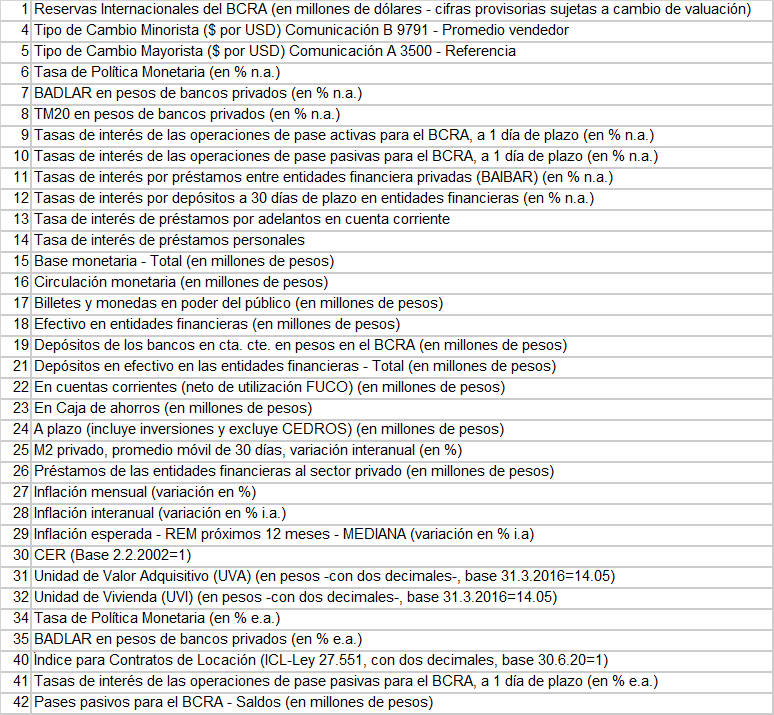

In [33]:
idVariable="1"
desde='2023-05-16'
hasta='2025-05-16'

url = f'https://api.bcra.gob.ar/estadisticas/v3.0/monetarias/{idVariable}?desde={desde}&hasta={hasta}'
response = requests.get(url, verify=False)

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [35]:
json_data = json.loads(response.text)

resultados = json_data['results']

df = pd.DataFrame(resultados)
df['fecha'] = pd.to_datetime(df['fecha'])

In [36]:
df

idVariable      fecha    valor
0             1 2025-05-16  38338.0
1             1 2025-05-15  38346.0
2             1 2025-05-14  38565.0
3             1 2025-05-13  38651.0
4             1 2025-05-12  38079.0
..          ...        ...      ...
481           1 2023-05-22  33062.0
482           1 2023-05-19  33159.0
483           1 2023-05-18  33132.0
484           1 2023-05-17  33298.0
485           1 2023-05-16  33350.0

[486 rows x 3 columns]